In [1]:
from dataset import *
import matplotlib.pyplot as plt
import torch

In [5]:
density = 10
R = 10
center1 = (20,20)
r1 = 1
center2 = (50,50)
r2 = 1
truncated = False
cartesian = True

test,area = get_ellipse(density, (1.091726, 1.01921194), 1.7, cartesian)
print(test.shape)
print(get_edge_index2(test,10).shape)
plt.figure(figsize=(10,10))
plt.scatter(test[:,0],test[:,1])
#plt.axis('equal')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()


(get_edge_index(test,10) == get_edge_index2(test,10))

(1, 2)


NameError: name 'get_edge_index2' is not defined

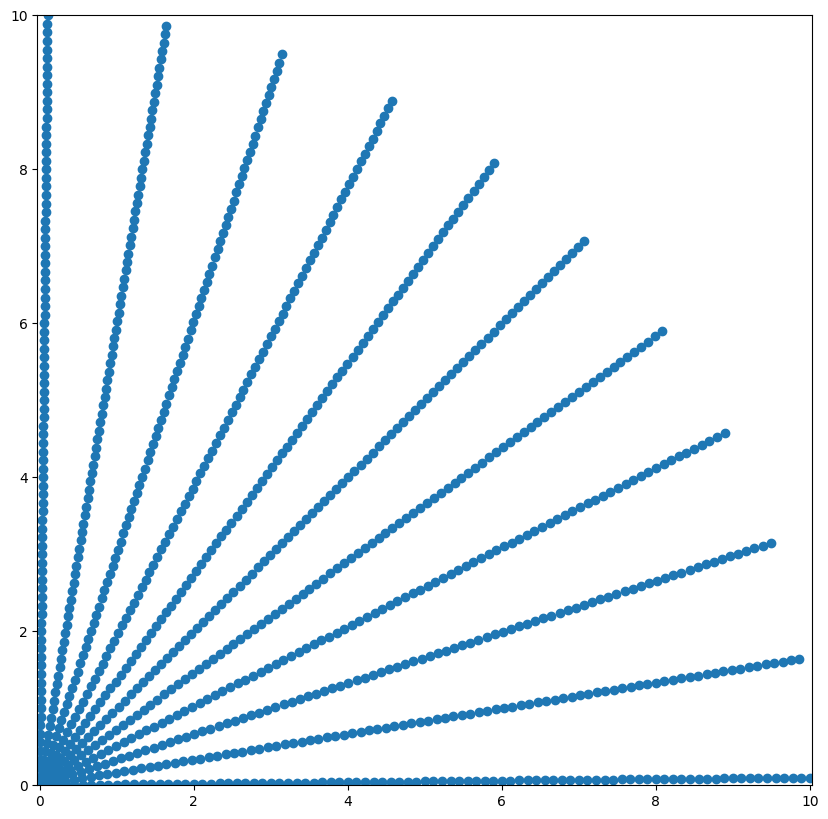

(91, 11)
(91, 11)


In [2]:
angles = np.linspace(0.01, np.pi/2 -0.01, 11)
rmax = 10
density = round(1000)
r = np.linspace(1e-3, rmax, round(density/11))
x = (r[:,np.newaxis]*np.cos(angles))
y = (r[:,np.newaxis]*np.sin(angles))
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.axis('equal')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()
print(x.shape)
print(y.shape)

number of point  2829


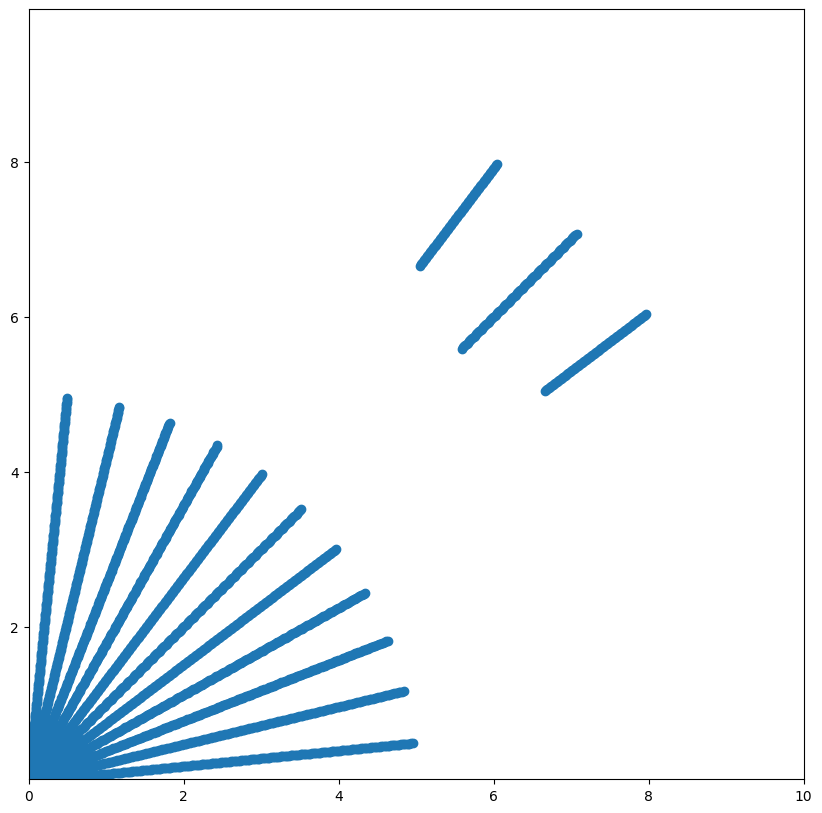

In [3]:
a = 5
b = 5
cartesian = False
angle = np.pi/4
density = 10000/a*10

test, area = get_multiple_circles(density, a, (7,7), 2, cartesian = False)
print("number of point ", len(test))
get_edge_index(test,10)

plt.figure(figsize=(10,10))
plt.scatter(test[:,0],test[:,1])
plt.axis('equal')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

In [ ]:
tensor = get_edge_index(test,10)


In [ ]:
print(tensor[0, :10])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
import scipy.spatial 

def nearest_neighbors(arr, k):
    k_lst = list(range(k + 2))[2:]  # [2,3]
    neighbors = []

    for row in arr:
        # stack the data so each element is in its own row
        data = np.vstack(row)
        # construct a kd-tree
        tree = scipy.spatial.cKDTree(data)
        # find k nearest neighbors for each element of data, squeezing out the zero result (the first nearest neighbor is always itself)
        dd, ii = tree.query(data, k=k_lst)
        # apply an index filter on data to get the nearest neighbor elements
        closest = data[ii].reshape(-1, k)
        neighbors.append(closest)
    return np.stack(neighbors)

In [ ]:
tree = scipy.spatial.cKDTree(test)
_, ii = tree.query(test, 10)
a = np.repeat(np.arange(len(test)),10)
edge_index = np.vstack((a, ii.flatten()))
print(torch.tensor(edge_index, dtype = torch.long))

tensor([[    0,     0,     0,  ..., 11999, 11999, 11999],
        [11940, 11880, 11820,  ...,   719,  7379,  8219]])


In [ ]:
def hello(a): 
    list = []
    for i in range(10000):
        None
    list.append(a)
    print(list[-2:])


In [ ]:
length = np.random.uniform(1, 10, (10,2))
length += np.arange(10)[:,np.newaxis]

In [ ]:
a = [1,2,3,4,5]
np.random.uniform(np.array([1,2,3,4,5])[:, np.newaxis], 10, (5,2))

array([[3.58922999, 3.90445403],
       [6.36922129, 6.97646045],
       [6.55942216, 9.68027806],
       [8.51127676, 6.01973727],
       [7.43243863, 8.82059486]])

In [ ]:
var = False
with True as var:
    print(var)

AttributeError: __enter__

In [ ]:
print(np.sqrt((1.442-4.971)**2 + (4.961-6.396)**2))

x = np.array([[1.442, 4.961],[1.442, 4.961],[1.442, 4.961]])
y = np.array([[4.971, 6.396],[4.971, 6.396],[4.971, 6.396]])

print(np.linalg.norm(y-x, axis=1))

x - [1,1]

3.8096018164632373
[3.80960182 3.80960182 3.80960182]


array([[0.442, 3.961],
       [0.442, 3.961],
       [0.442, 3.961]])

100
100
41


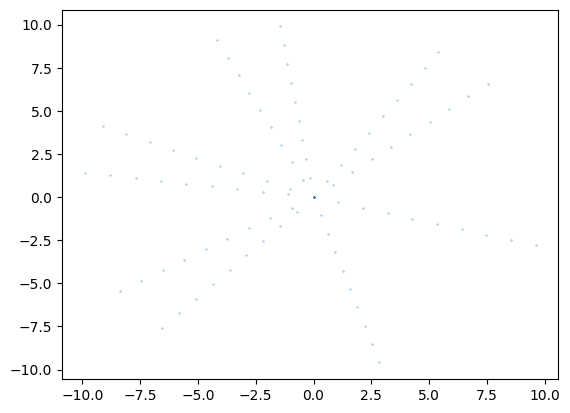

In [ ]:
density = 10
angles = [1,2,3,4,5,6,7,8,9,10]
radius = np.linspace(1e-3, 10, round(density))
r, theta = np.meshgrid(radius, angles)
x = (r*np.cos(theta)).flatten()
y = (r*np.sin(theta)).flatten()
print(len(x))
print(len(y))
print(((x <= 1) & (y <= 1)).sum())
plt.figure()
plt.plot(x,y, '.', markersize = 0.5)
plt.show()

In [34]:
filenames = ['Unique_Ellipse_cartesian',
            'Unique_Ellipse_polar',
            'Two_Circles_cartesian',
            'Two_Circles_polar',
            'Three_Circles_cartesian',
            'Three_Circles_polar',
            'Truncated_Once_cartesian',
            'Truncated_Once_polar',
            'Truncated_Twice_cartesian',
            'Truncated_Twice_polar']
x_list = []
label_list = []
ind_list = []
edge_index = []
for i in range(len(filenames)):
    data = np.load('Data/raw/'+filenames[i]+'_test2.npy', allow_pickle = True)
    x_list.append(data['coords'])
    label_list.append(data['labels'])
    ind_list.append(data.item()['slices'].astype(int))
    edge_index.append(data.item()['edge_index'])

In [28]:
print((label_list[i][j]).numpy())

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [36]:

for i in range(len(filenames)):
    for j in range(len(ind_list[i])-1):
        plt.figure()
        plt.plot(x_list[i][ind_list[i][j]:ind_list[i][j+1],0], x_list[i][ind_list[i][j]:ind_list[i][j+1],1], '.', markersize = 1)
        plt.xlim([0,10])
        plt.ylim([0,10])
        plt.title('Area = '+ str((label_list[i][j])))
        plt.savefig('Figures/'+filenames[i]+'/' + str(j))
        plt.close()

In [37]:
x = data.x
label = data.y

ind = slice['x'].tolist()
print(x.shape)
for i in range(10):
    plt.figure()
    plt.plot(x[ind[i]:ind[i+1],0], x[ind[i]:ind[i+1],1], '.', markersize = 1)
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'x'

In [ ]:
print(ind_list[0])

[0, 11132, 54060, 54194, 54219, 54357, 54530, 56023, 57583, 58666, 59387]


In [ ]:
dict = {
    'label': np.arange(3),
    'edge_index': np.zeros((2,1)),
    'coordinates': [],
    'slices': [0]
}

density = 10
R = 3
center1 = (6,3)
r1 = 0.5
center2 = (3,3)
r2 = 0.5
truncated = True
cartesian = True
test1, area1 = get_multiple_circles(density, R, center1, r1, center2, r2, cartesian, truncated)
dict['coordinates'] = np.column_stack((dict['coordinates'],test1))
dict['edge_index'] = np.column_stack((dict['edge_index'],get_edge_index(test1,10)))
dict['slices'].append(len(test1))

density = 100
R = 5
center1 = (6,3)
r1 = 0.5
center2 = (3,3)
r2 = 0.5
truncated = False
cartesian = True
test2, area2 = get_multiple_circles(density, R, center1, r1, center2, r2, cartesian, truncated)
dict['coordinates'] = np.column_stack((dict['coordinates'],test2))
dict['edge_index'] = np.column_stack((dict['edge_index'],get_edge_index(test2,10)))
dict['slices'].append(len(test2))

density = 1000
R = 6
center1 = (6,3)
r1 = 0.5
center2 = (3,8)
r2 = 0.5
truncated = False
cartesian = False
test3, area3 = get_multiple_circles(density, R, center1, r1, center2, r2, cartesian, truncated)
dict['coordinates'] = np.column_stack((dict['coordinates'],test3))
dict['edge_index'] = np.column_stack((dict['edge_index'],get_edge_index(test3,10)))
dict['slices'].append(len(test3))



ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 0 and the array at index 1 has size 79

In [ ]:
print(np.shape(dict['coordinates']))
edge_index
a = np.empty((2,1))
c = [np.ones((2,6)), np.ones((2,6)),np.ones((2,6))]
b = np.hstack(c)


print(len(b))

(0,)
2


In [ ]:
a = np.arange(20000*10000)
b = np.arange(20000*10000)
c = np.arange(20000*10000)

In [7]:
data = np.load('Data/raw/Three_Circles_cartesian0.npz', allow_pickle = True)


In [8]:
coords     = data['coords']
slices     = data['slices']


In [15]:
a = slices[-1].astype(int)
b = slices[-2].astype(int)
coords[a:b,:]

array([], shape=(0, 2), dtype=float64)

In [6]:
a = np.arange(10)
print(a)
b = np.arange(2*(len(a)-1)).reshape((len(a)-1, 2))
print(b)
for i in range(len(a) - 1):
    print('A = ', a[i:i+2])
    print(b[a[i:i+2],:])

[0 1 2 3 4 5 6 7 8 9]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]]
A =  [0 1]
[[0 1]
 [2 3]]
A =  [1 2]
[[2 3]
 [4 5]]
A =  [2 3]
[[4 5]
 [6 7]]
A =  [3 4]
[[6 7]
 [8 9]]
A =  [4 5]
[[ 8  9]
 [10 11]]
A =  [5 6]
[[10 11]
 [12 13]]
A =  [6 7]
[[12 13]
 [14 15]]
A =  [7 8]
[[14 15]
 [16 17]]
A =  [8 9]


IndexError: index 9 is out of bounds for axis 0 with size 9

In [1]:
coords[0:2, :]

NameError: name 'coords' is not defined

In [16]:
graph = Data(x=coords, edge_index=edge_index, y=labels)

In [20]:
np.amax(np.ones((10,2)), axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [1]:
%pip install --upgrade pip
%pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
%pip install torch-sparse==0.6.13 -f https://pytorch-geometric.com/whl/torch-1.10.0+cu113.html
%pip install torch-geometric
%pip install torch-cluster -f https://data.pyg.org/whl/torch-1.12.1+cu113.html

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
DEPRECATION: Configuring installation scheme with distutils config files is deprecated 

In [3]:
from dataset import *
import torch

In [5]:
dataset = EllipsesDataset(root = 'Data')

Processing...


--- File  1 / 16  ---
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/tabtab/.pyenv/versions/3.10.1/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/9y/ryc1xybn5gbczjsb6wzyvwr40000gn/T/ipykernel_8022/2559240680.py", line 1, in <module>
    dataset = EllipsesDataset(root = 'Data')
  File "/Users/tabtab/Documents/EPFL/Master/CERN/GNN_circle/dataset.py", line 237, in __init__
    super().__init__(root, transform, pre_transform, pre_filter)
  File "/Users/tabtab/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py", line 50, in __init__
    super().__init__(root, transform, pre_transform, pre_filter)
  File "/Users/tabtab/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torch_geometric/data/dataset.py", line 87, in __init__
    self._process()
  File "/Users/tabtab/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torch_geometric/data/dataset.py", line 

In [15]:
x = np.ones(100)
torch.tensor(x, dtype = torch.float32)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
import numpy as np
data = np.load('Data/raw/Two_Circles_cartesian0.npz', allow_pickle= True)
slices = data['slices']


In [11]:
print('number of points in average per sample', slices[-1]/(len(slices)-1))

number of points in average per sample 1923.09342


In [8]:
np.save('/Volumes/A001/GNN_circle/Data.npy', np.arange(100))

In [3]:
data = np.load('Data/raw/Three_Circles_cartesian0.npz')

In [5]:
data['slices']

array([0.0000000e+00, 4.9240000e+03, 4.9970000e+03, ..., 8.0542537e+07,
       8.0542680e+07, 8.0542738e+07])

# test dataset generated 

In [2]:
data = torch.load('/Volumes/A001/GNN_circle/Data/processed/data_3.dt')

In [3]:
data_, dict = data


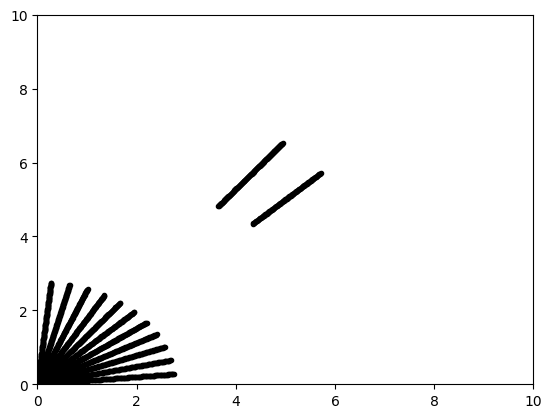

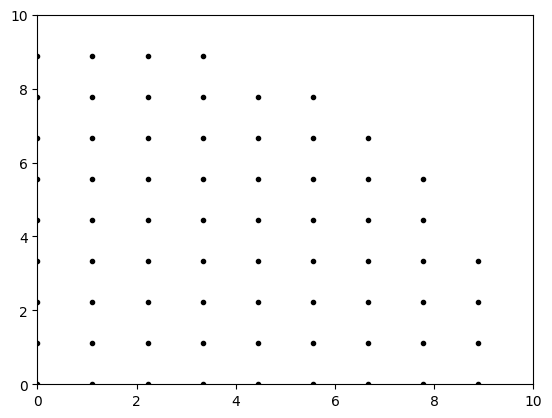

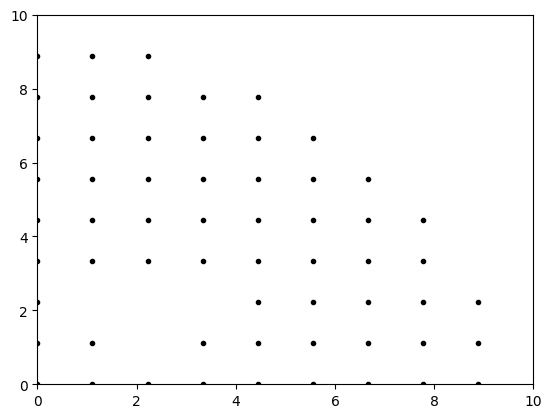

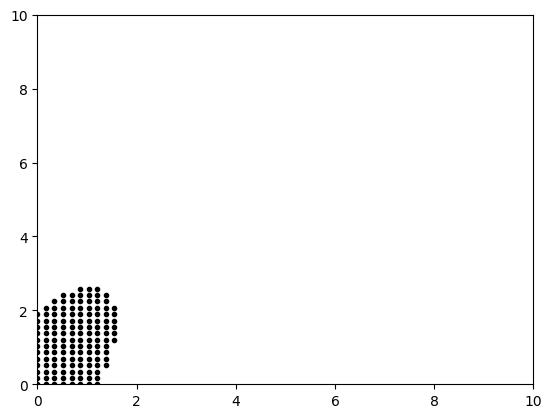

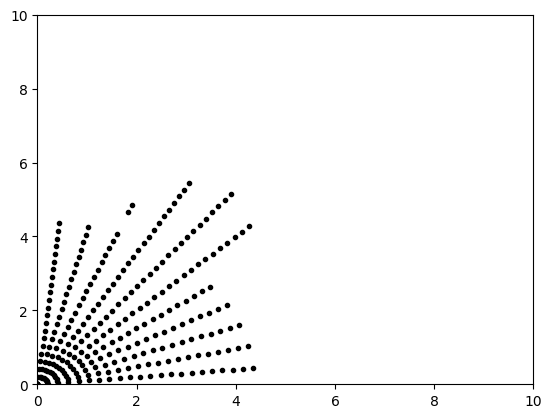

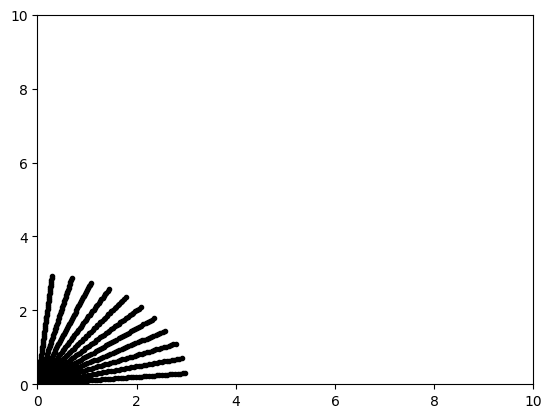

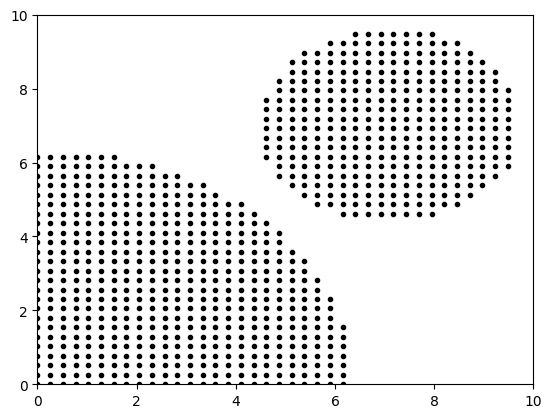

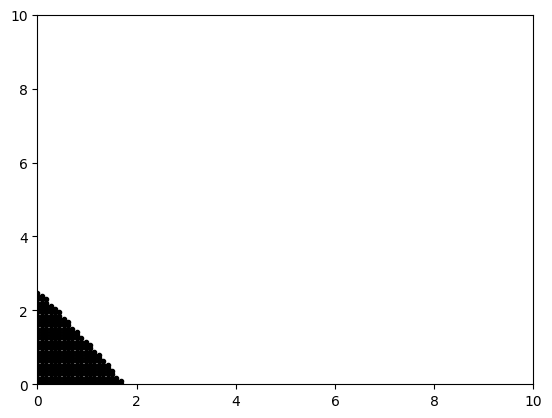

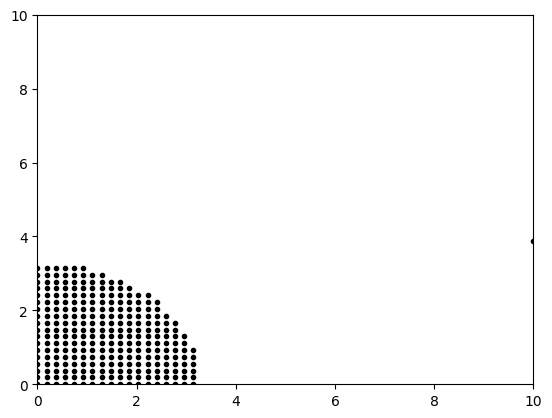

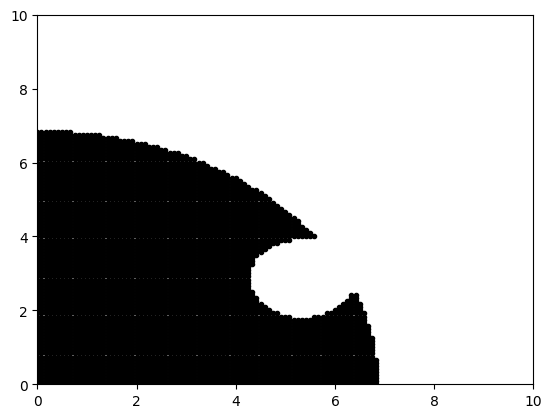

In [4]:
# pick 10 random indices 
samples_idx = np.random.randint(0, len(dict['x']), (10,))
torch.Tensor.ndim = property(lambda self: len(self.shape))  # Fix it

for idx in samples_idx:
    x_s, x_e = dict['x'][idx].item(), dict['x'][idx+1].item()
    x = data_.x[x_s:x_e]
    plt.figure()
    plt.plot(x[:,0],x[:,1] , 'k.')
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.show()

In [6]:
dataset = test('/Volumes/A001/GNN_circle/Data/')

In [123]:
355005%50000

5005

In [136]:
idx = 102
x_s, x_e = dict['edge_index'][idx].item(), dict['edge_index'][idx+1].item()
data_.edge_index[:, x_s:x_e]
dict['edge_index'][idx].item()


2048040